In [ ]:
#Global Footprint Network (GFN) is an international nonprofit organization founded in 2003.
#It envisions a future where all can thrive within the means of our one planet.

#Their mission is to help end ecological overshoot
#by making ecological limits central to decision-making.

#GFN's Ecological Footprint is the only metric that compares the resource 
#demand of individuals, governments, and businesses against what Earth can renew.

#Here's their website:https://www.footprintnetwork.org/
#Here's an informative blog posted by GFN about biocapacity:
#https://www.footprintnetwork.org/2018/04/09/has_humanitys_ecological_footprint_reached_its_peak/

In [131]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
#%matplotlib inline


In [132]:
#Import and check out the data
#This is where I got the dataset from: 
#https://www.kaggle.com/footprintnetwork/ecological-footprint#countries.csv

footprint = pd.read_csv("countries.csv")
footprint.info()
footprint.describe()
footprint.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
Country                           188 non-null object
Region                            188 non-null object
Population (millions)             188 non-null float64
HDI                               172 non-null float64
GDP per Capita                    173 non-null object
Cropland Footprint                173 non-null float64
Grazing Footprint                 173 non-null float64
Forest Footprint                  173 non-null float64
Carbon Footprint                  173 non-null float64
Fish Footprint                    173 non-null float64
Total Ecological Footprint        188 non-null float64
Cropland                          173 non-null float64
Grazing Land                      173 non-null float64
Forest Land                       173 non-null float64
Fishing Water                     173 non-null float64
Urban Land                        173 non-null float64
Total Biocapacity 

Index(['Country', 'Region', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality'],
      dtype='object')

In [133]:
#GDP per Capita is listed as an object instead of a float because of the dollar signs,
#so I didn't use that data in this analysis.  However, GDP is an important variable
#and I will include it in the next project if I use this dataset.

In [134]:
 footprint1 = footprint.dropna()

In [135]:
#Let's see how many rows we've lost due to taking out Na values

footprint1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 187
Data columns (total 21 columns):
Country                           162 non-null object
Region                            162 non-null object
Population (millions)             162 non-null float64
HDI                               162 non-null float64
GDP per Capita                    162 non-null object
Cropland Footprint                162 non-null float64
Grazing Footprint                 162 non-null float64
Forest Footprint                  162 non-null float64
Carbon Footprint                  162 non-null float64
Fish Footprint                    162 non-null float64
Total Ecological Footprint        162 non-null float64
Cropland                          162 non-null float64
Grazing Land                      162 non-null float64
Forest Land                       162 non-null float64
Fishing Water                     162 non-null float64
Urban Land                        162 non-null float64
Total Biocapacity 

In [136]:
footprint1.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
5,Argentina,Latin America,41.09,0.83,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,2.64,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.45,6


/Users/kateberman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kateberman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


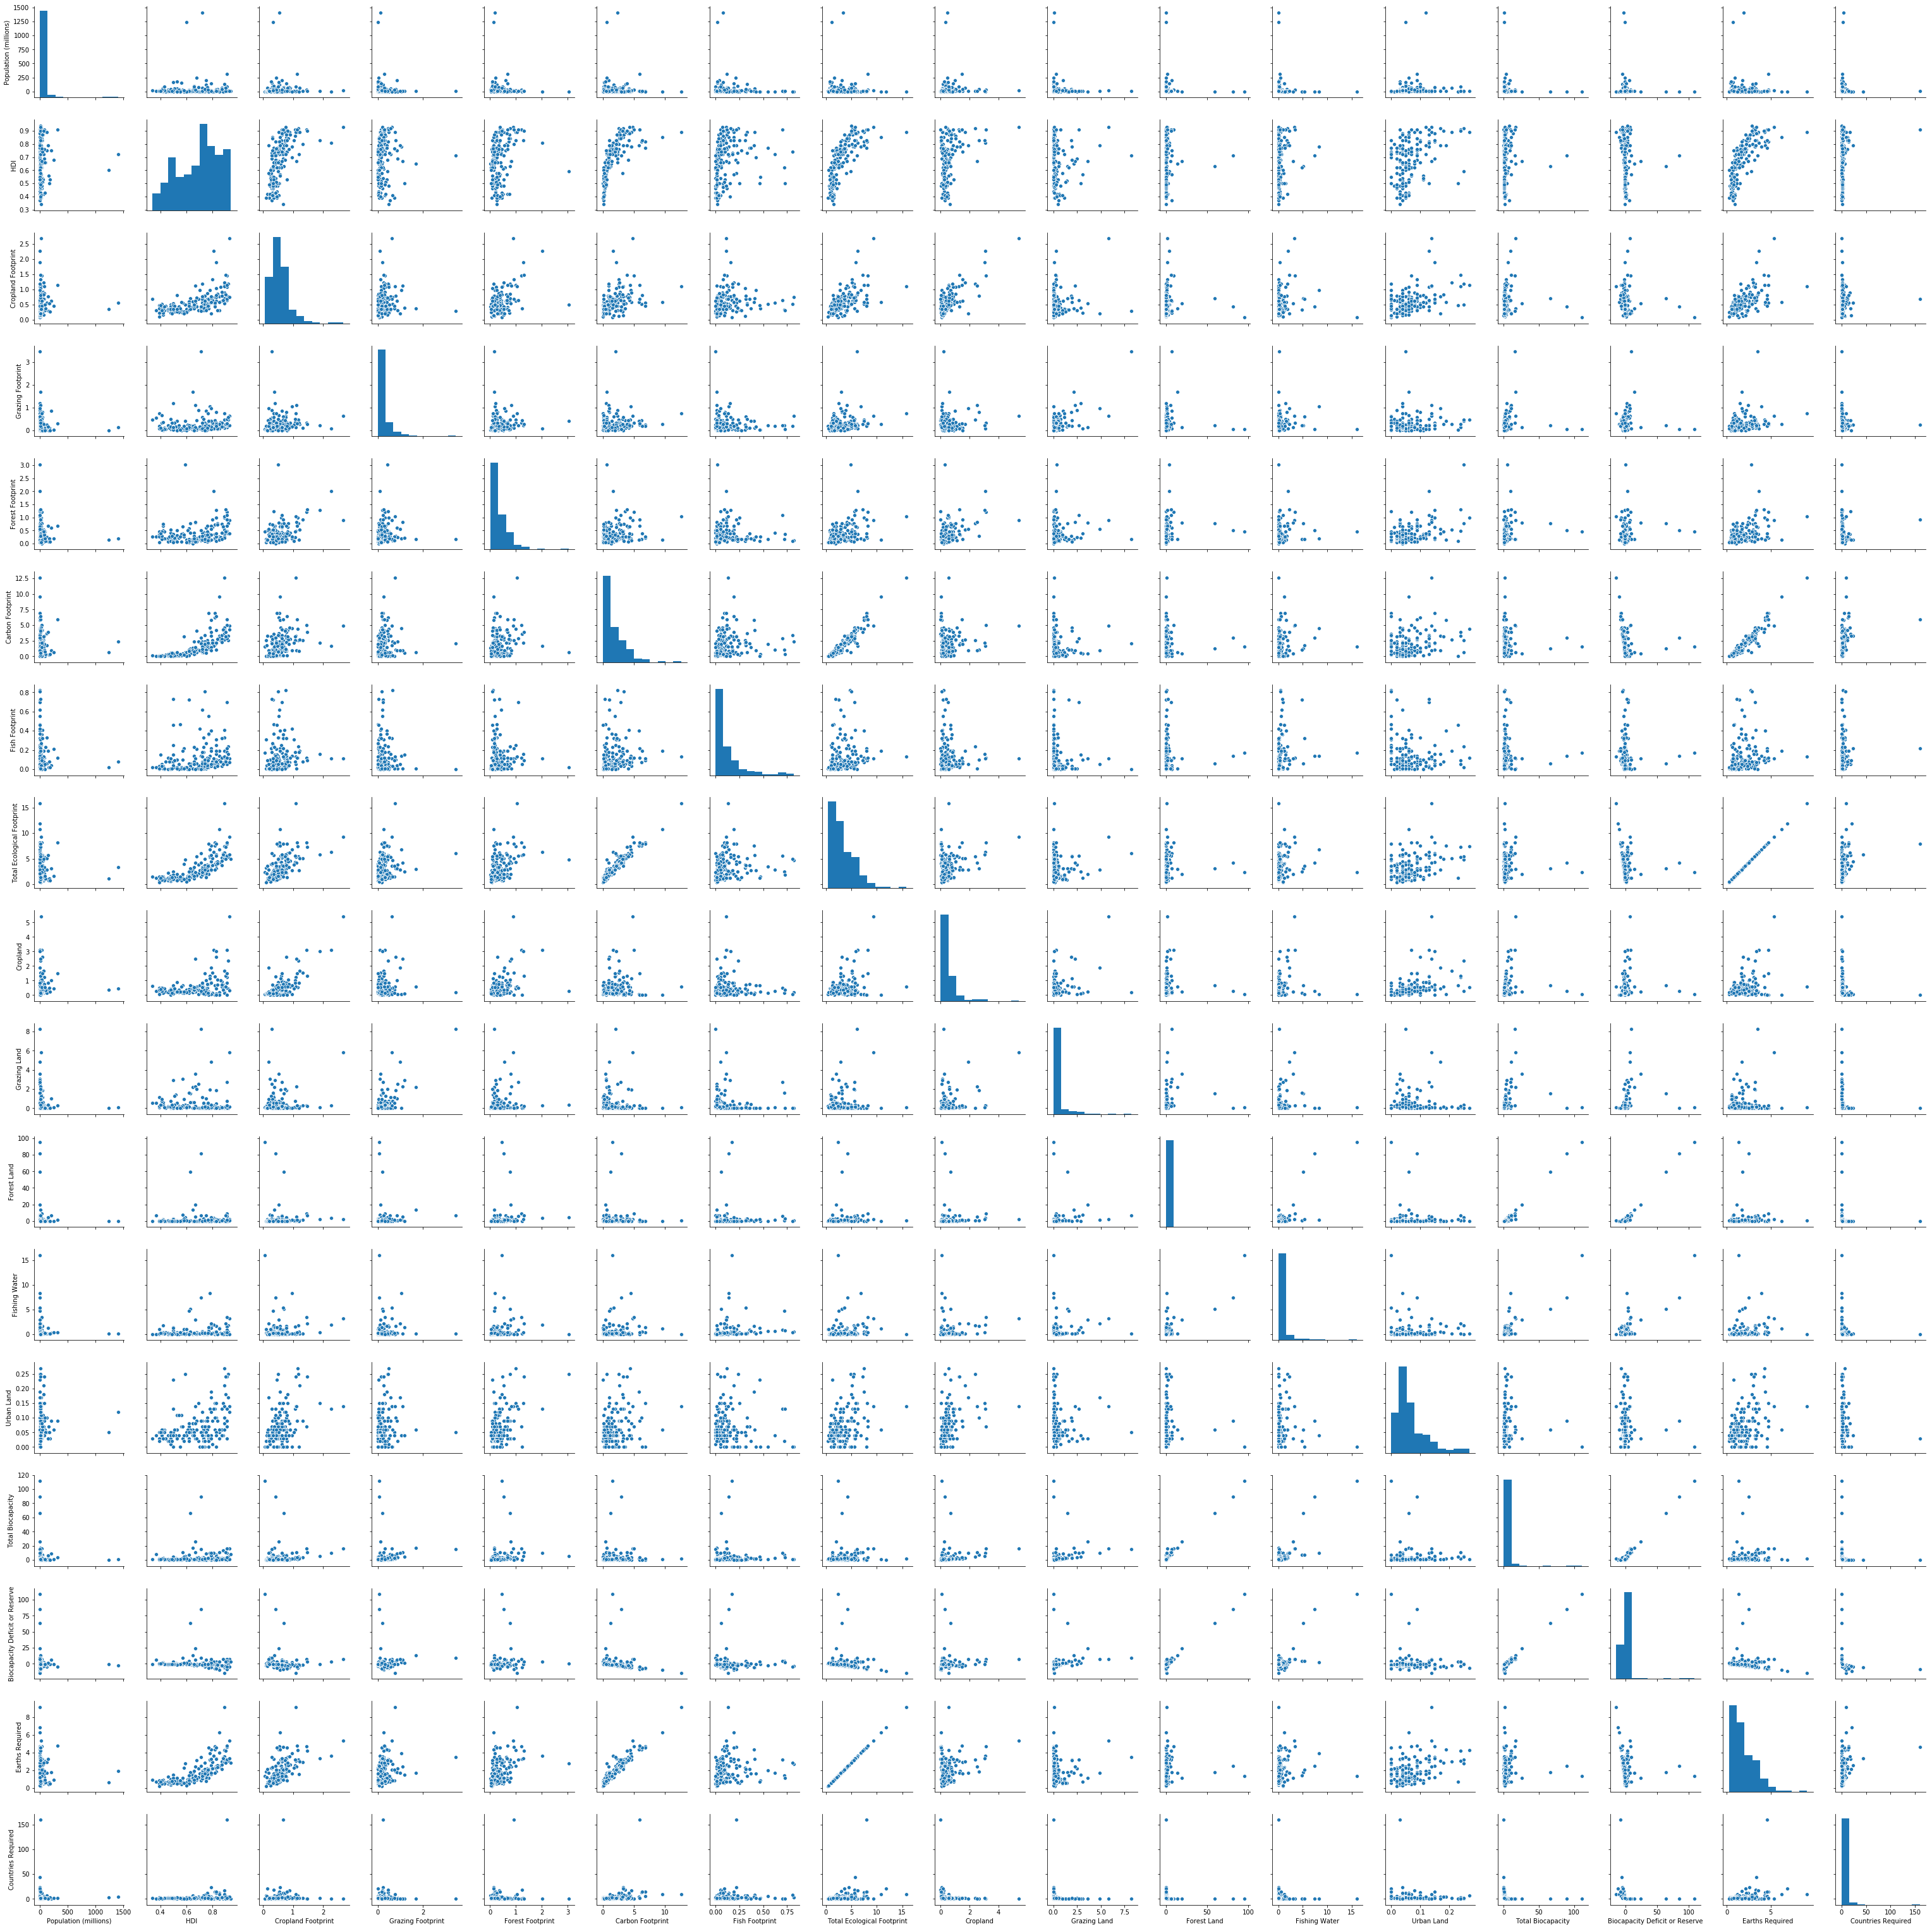

In [137]:
sns.pairplot(footprint)

/Users/kateberman/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


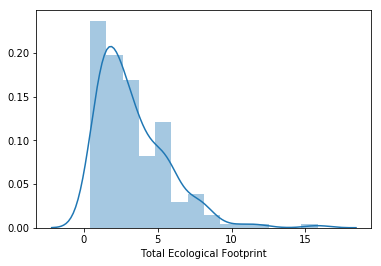

In [138]:
#Look at histogram of Total Ecological Footprint to get the big picture

sns.distplot(footprint['Total Ecological Footprint'])

In [139]:
footprint1.corr()

,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
Population (millions),1.000000,0.001089,-0.031503,-0.087369,-0.082299,-0.020418,-0.063696,-0.050838,0.005595,-0.073721,-0.044718,-0.079783,0.051354,-0.057019,-0.043947,-0.050773,-0.021340
HDI,0.001089,1.000000,0.567227,0.091115,0.229435,0.699076,0.208433,0.734319,0.326258,-0.002710,0.018198,0.129884,0.377923,0.058457,-0.128844,0.734328,0.201202
Cropland Footprint,-0.031503,0.567227,1.000000,0.055625,0.460659,0.426937,0.070000,0.597593,0.769782,0.060984,0.020743,0.219609,0.421723,0.112430,-0.040197,0.597366,0.036986
Grazing Footprint,-0.087369,0.091115,0.055625,1.000000,0.044191,0.124313,-0.097971,0.265819,0.107669,0.705631,0.061289,0.128347,0.093593,0.158680,0.090514,0.265766,-0.027361
Forest Footprint,-0.082299,0.229435,0.460659,0.044191,1.000000,0.189950,-0.018753,0.396547,0.433876,0.084457,0.178711,0.162619,0.481263,0.222853,0.121220,0.396855,0.072219
Carbon Footprint,-0.020418,0.699076,0.426937,0.124313,0.189950,1.000000,0.153810,0.953907,0.126874,-0.039560,0.021952,0.182334,0.249326,0.048477,-0.194781,0.953923,0.297168
Fish Footprint,-0.063696,0.208433,0.070000,-0.097971,-0.018753,0.153810,1.000000,0.184324,-0.051461,-0.060346,-0.001390,0.207666,0.005039,0.013855,-0.033074,0.184042,0.076586
Total Ecological Footprint,-0.050838,0.734319,0.597593,0.265819,0.396547,0.953907,0.184324,1.000000,0.311244,0.093933,0.059087,0.243326,0.381518,0.118530,-0.136652,0.999997,0.260966
Cropland,0.005595,0.326258,0.769782,0.107669,0.433876,0.126874,-0.051461,0.311244,1.000000,0.293468,0.045520,0.209708,0.429913,0.176666,0.096860,0.311135,-0.126642
Grazing Land,-0.073721,-0.002710,0.060984,0.705631,0.084457,-0.039560,-0.060346,0.093933,0.293468,1.000000,0.151265,0.200166,0.033023,0.293915,0.269280,0.093434,-0.100921


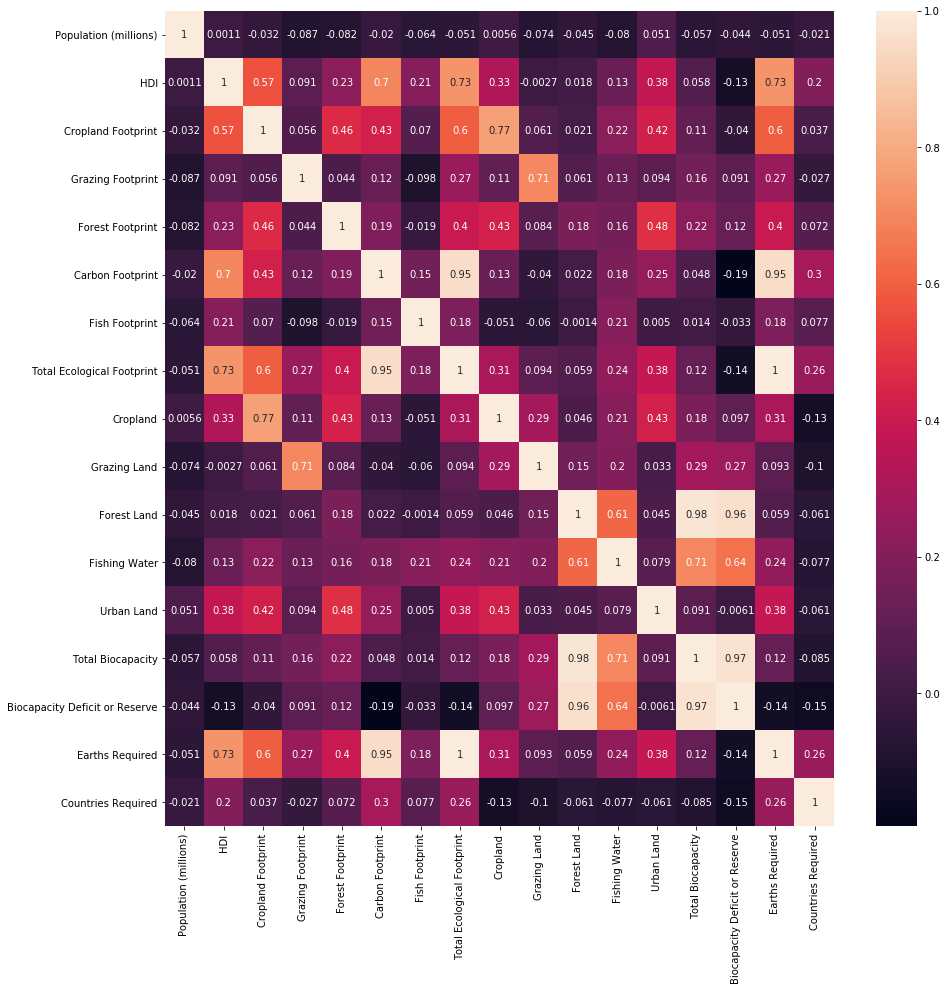

In [140]:
# It's hard to see the correlations with small graphs and long number strings, so 
#next I made a heatmap of the above correlations and annotated it for a better understanding

Var_Corr = footprint1.corr()
plt.figure(figsize = (15,15))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)


In [141]:
#Based on the above heatmap, I chose to look at the correlation between Forest Land 
#vs Total Biocapacity 

In [239]:
#I assign columns to X and y and reshape. I have to reshape X and y to make them 
#the same shape in order to make the pink and red graph further down this document

X = footprint1[ 'Forest Land']         
y = footprint1['Total Biocapacity']
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)

In [240]:
#Now we test, train, and split the chosen data

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [243]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [244]:
#Let's check the size of the training and testing data

In [245]:
X_train.shape, y_train.shape

((97, 1), (97, 1))

In [248]:
X_test.shape, y_test.shape

((65, 1), (65, 1))

In [251]:
#Next we fit the training data to a linear model

In [252]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [253]:
#Then we use the model to predict the test data

In [254]:
y_predicted = lm.predict(X_test)

In [255]:
#Using Numpy we measure the accuracy of the model by using the mean square error (MSE)

In [256]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

1.4286024544465596


In [257]:
#Using sklearn metrics, let's do the same thing and see if we get the same answer

In [258]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = lm.predict(X_test)))

1.4286024544465596


In [259]:
#Let's find the error on the training data

In [260]:
print(mean_squared_error(y_true = y_train, y_pred = lm.predict(X_train)))

4.6177623796870515


In [261]:
#How much does the model (the x variable) account for the variability of y 
#around its mean? 
#About 73% of the variability in Y can be explained using X

In [262]:
lm.score(X_test, y_test)

0.7273891721861365

In [263]:
#Now let's check the histogram of the residuals. Does it satisfy the assumptions 
#for inference?

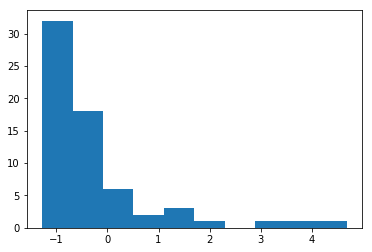

In [264]:
plt1 = plt.hist(y_test - y_predicted)

In [265]:
X_test.size


65

In [266]:
y_test.size

65

<function matplotlib.pyplot.show(*args, **kw)>

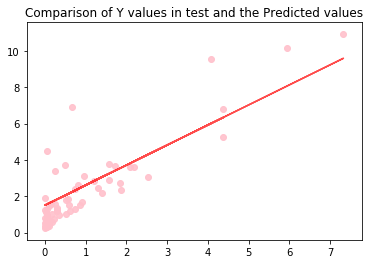

In [267]:

plt.title('Comparison of Y values in test and the Predicted values')

plt.plot(X_test, y_predicted, color = 'red', alpha = 0.7)

plt.scatter(X_test, y_test, color = 'pink', alpha = 0.9)

plt.show

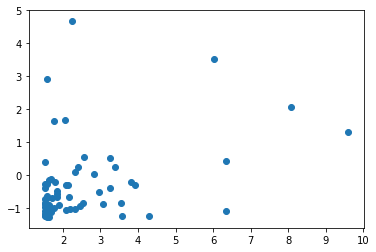

In [268]:
plt.scatter(y_predicted, y_test - y_predicted)

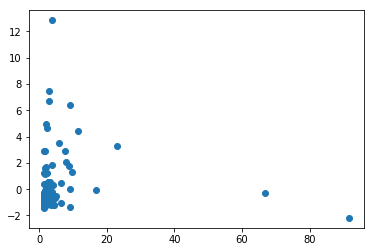

In [269]:
#plot of the residuals vs y predicted (full data set)

plt.scatter(lm.predict(X), y - lm.predict(X))

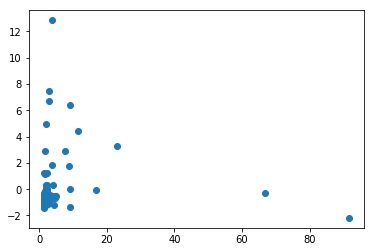

In [270]:
plt.scatter(lm.predict(X_train), y_train - lm.predict(X_train))

In [271]:
print(lm.coef_)

[[1.10394014]]


In [272]:
print(lm.intercept_)

[1.50845502]


In [273]:
from sklearn.neural_network import MLPRegressor

In [274]:
nn_reg = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,2,2), random_state=1)

In [275]:
nn_reg.fit(X_train, y_train)

/Users/kateberman/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [276]:
y_pred_nn = nn_reg.predict(X_test)

In [277]:
np.mean( (y_test - y_pred_nn) **2 )

10.85502281789838

In [278]:
from sklearn.metrics import r2_score, mean_absolute_error
mean_absolute_error(y_test, y_pred_nn)


0.8365801959646522

In [279]:
mean_absolute_error(y_train, nn_reg.predict(X_train))

1.0644883867985548

In [280]:
#The closer the r squared value is to 100 percent, the better the model is.

r2_score(y_test, y_pred_nn)


0.710906851531963